In [3]:
import numpy as np
import copy
import matplotlib.pyplot as plt

from lr_utils import load_dataset

In [4]:
# 고양이인 데이터와 고양이가 아닌 데이터를
# 로지스틱 회귀를 통해 구분해보기
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

y = [1], it's a 'cat' picture.


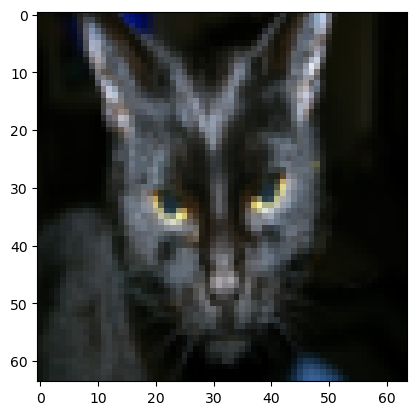

In [ ]:
#plt.imshow는 이미지를 보여줄 수 있다
index = 25
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

In [ ]:
#원본 데이터셋을 불러온 다음, 그 데이터셋의 대략적인 개형과 shape 찍어보기
#아하 209, 64 ,64, 3은 3채널로 된 64x64개의 픽셀로 된 사진이 209장이 있구나!
print(train_set_x_orig.shape)

(209, 64, 64, 3)


In [19]:
#직접 분포가 어떤지 한번 뜯어볼 것 같아
print("data's max value is",train_set_x_orig[1].max())
print("data's min is", train_set_x_orig[1].min())
#값이 7부터 255까지 있구나!

data's max value is 255
data's min is 7


In [22]:
print(train_set_y)
print(train_set_y.shape)
#y는 [0,1,1,0,0,0,1,...,1] 이런식으로 고양이인지 아닌지의 여부가 0과 1로 표현되어있구나

[[0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0
  0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1
  0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 1
  1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0
  1 1 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1 0 1 0 1
  0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0]]
(1, 209)


In [24]:
#m은 주로 dl에서 데이터셋의 갯수를 표현하는데 쓰임
m_train = train_set_y.shape[1]
m_test = test_set_y.shape[1]
num_px = train_set_x_orig.shape[1]

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


In [28]:
# 2. 각 209개의 test데이터셋과 train 데이터셋을 reshape해야 함
# x_train 같은 경우에는 (64*64*3, 209) 의 형태로 만들어야 한다.
# 64*64*3이던 데이터가 한 줄로 합쳐져서 평탄화 되었기에 flatten 이라는 이름을 쓴다
# reshape에는 특별한 기능이 있는데, -1을 넣으면 나머지의 형태를 알아서 맞춰줌
# 예를들어 shape= (10,1) 짜리를 reshape(5,-1) -> (5,2)로 자동으로 조정

train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1) #일단 (209,64*64*3) 의 형태로 조정
train_set_x_flatten = train_set_x_flatten.T # 그 후 (12288,209)형태로 재조정. 익숙해지면 밑처럼 한번에 써도 됨

#이건 위 과정을 한번에 쓴거
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T


In [ ]:

# 데이터의 생긴 모습을, 하나의 개별 데이터는 세로로 쭉 있고
# 걔네들이 가로로 209개, 50개 쌓인 모습을 상상해보세요
#train_data = [x1, x2, x3, ...,x209]
'''
그리고 개별 x1 하나는 요렇게 세로로 길다랗게 생김
x1= [
    [1],
    [2],
    ...,
    [12288]
]
'''
print(train_set_x_flatten.shape)
print(test_set_x_flatten.shape)


(12288, 209)
(12288, 50)


In [52]:
#표준편차를 1로 만들자.. 정규화를 하는 의미에서 적절한 수로 나눠줌
normalize_num = np.float32(train_set_x_flatten.max())
train_set_x = train_set_x_flatten / normalize_num
test_set_x = test_set_x_flatten / normalize_num

In [ ]:
'''
아키텍쳐 생각해보기
12288개의 input layer과 1개의 output layer를 설정
만약 output의 특성이 0.5를 넘으면 cat 아니면 cat이 아니도록 설정
레이어 정의
sigmoid 정의
정확도 평가 설계
규칙 : X,Y는 dataset으로 묶기
       w,b = params으로 묶기
'''

'\n아키텍쳐 생각해보기\n12288개의 input layer과 1개의 output layer를 설정\n만약 output의 특성이 0.5를 넘으면 cat 아니면 cat이 아니도록 설정\n레이어 정의\nsigmoid 정의\n정확도 평가 설계\n'

In [54]:
# 파라미터 초기 설정
# J가 볼록 함수라고 알려져있고 따라서 w와 b를0으로 초기화해도 알아서 굴러 떨어질 거라
# 걍 0으로 초기화해줍시다
def initialize_with_zeros(dim):
    # dim은 생성하기르 원하는 w와 b의 차원 수
    # layer size 를 1로만 할거기 때문에 
    # params 의 모양은 세로로 쭉 늘어선 모양이어야겠지요?
    # 우리가 원하는 건 12288개로 쭉 늘어선 w들과 하나의 b일 거에요
    # z = w1,w2,...,w12288 + b1 같은 형태일 거니까요
    # 사용할때는 dim = 12288 이렇게 적으면 되는거죠
    w = np.zeros((dim, 1))
    b= 0.
    params = (w,b)
    return params

In [55]:
#시그모이드 정의 
#밑이 e인 경우는 np.exp사용
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

In [67]:
#파라미터를 순전파하는 forward 설정
def propagate(params, dataset):
    #데이터의 갯수는 x의 두번째 열입니다.
    w, b = params
    X, Y = dataset
    m = X.shape[1]
    #초기화된 파라미터건 무슨 파라미터건을 파라미터를 받습니다
    
    Z = w.T@X + b
    A = sigmoid(Z)

    #로지스틱 회귀의 손실함수 공식입니당
    cost = (Y * np.log(A) + (1-Y)* np.log(1-A)).sum() / -m
    #dw와 db는 직접 계산하지 않고, 이 손실함수에서의 알려진 공식을 사용합니다.
    dw = X@(A-Y).T / m
    db = (A-Y).sum() / m
    grads = {
        "dw": dw,
        "db": db
    }
    return grads, cost

In [ ]:
def optimize(dataset, num_iterations = 1000, lr = 0.009, print_cost = True):
    """
    dataset 요구사항: (x,y) 꼴이어야 하며, x는 (feature, m)으로 flatten되어 있어야 합니다
    또한 데이터는 0과 1사이로 정규화되어 있어야 좋습니다
    data의 x를 직접 찍어봐서, 0과 1사이인지 확인하고 스케일링이 잘 되있는지 확인하십시오.
    """
    costs= []
    X,Y  = dataset
    params = initialize_with_zeros(X.shape[0])
    w, b = params
    for i in range(num_iterations):
        grads, cost = propagate(params,dataset)
        dw = grads['dw']
        db = grads['db']
        w = w - lr*dw
        b = b - lr*db
        params = (w,b)
        if (i + 1) % 100 == 0:
            costs.append(cost)

            if print_cost:
                print(f"Cost after iterations {i + 1} : {cost}")
    params = {"w" : w, "b" : b}
    grads = {"dw" : dw, "db" : db}
    return params, grads, costs

In [86]:
cat_dataset = (train_set_x, train_set_y)
params, grads, costs = optimize(cat_dataset)

Cost after iterations 100 : 0.4467685147026559
Cost after iterations 200 : 1.4664058902954065
Cost after iterations 300 : 0.8763182439091711
Cost after iterations 400 : 0.6209725754622388
Cost after iterations 500 : 0.41156736502096397
Cost after iterations 600 : 0.2501114233447164
Cost after iterations 700 : 0.1687269500086677
Cost after iterations 800 : 0.15052194322356474
Cost after iterations 900 : 0.1396038223175397
Cost after iterations 1000 : 0.13039966643331916
